<a href="https://colab.research.google.com/github/nandinib1999/image-classification-with-tensorflow/blob/master/imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0-rc1


In [4]:
# loading Fashion MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist

(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
print(train_X.shape)
print(test_X.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [0]:
class_names = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

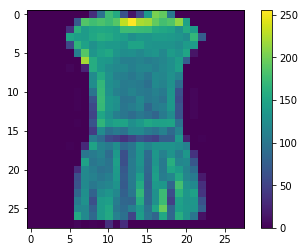

In [6]:
plt.figure()
plt.imshow(train_X[3])
plt.colorbar()
plt.grid(False)
plt.show()

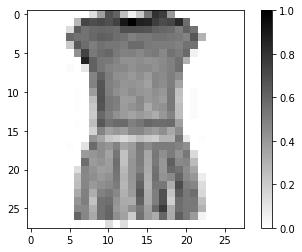

In [7]:
# Preprocessing -- Normalize pixel values from 0 - 255 range to 0 - 1 range before feeding into NN

train_X = train_X/255.0
test_X = test_X/255.0

# visualizing the sample
plt.figure()
plt.imshow(train_X[3], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Preprocessing -- Reshape all the images to 1-D array

train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

print(train_X.shape, test_X.shape)

(60000, 784) (10000, 784)


In [0]:
# Building Artificial Neural Network -- Fully Connected NN
model = keras.models.Sequential()

# Adding first layer to NN -- Dense layer
model.add(keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

# Adding dropout layer for regularization - prevent overfitting of model
model.add(keras.layers.Dropout(0.2))

# Adding output layer - 10 units because 10 unique classes - Softmax activation function returns probability of each class.
# Class with highest probability is predicted
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [10]:
# Train my model 
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(train_X, train_y, epochs=15)
test_loss, test_acc = model.evaluate(test_X, test_y)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3190 - accuracy: 0.8811
Epoch 2/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3087 - accuracy: 0.8856
Epoch 3/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3042 - accuracy: 0.8864
Epoch 4/15
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2927 - accuracy: 0.8910
Epoch 5/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2863 - accuracy: 0.8936
Epoch 6/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2767 - accuracy: 0.8962
Epoch 7/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2773 - accuracy: 0.8975
Epoch 8/15
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2694 - accuracy: 0.8990
Epoch 9/15
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2631 - accuracy: 0.9017
Epoch 10/15

In [25]:
print(test_acc)
predictions = model.predict(test_X)
print(test_y)
print(predictions)

0.8805
[9 2 1 ... 8 1 5]
[[7.2634254e-10 3.6027988e-16 1.4944663e-12 ... 1.5163900e-03
  2.1600238e-10 9.9841046e-01]
 [1.3905892e-04 2.6443734e-12 9.9774569e-01 ... 5.5156618e-26
  1.9510461e-10 4.5356200e-20]
 [1.8123161e-09 1.0000000e+00 2.7289118e-14 ... 0.0000000e+00
  9.9300071e-18 1.5549658e-27]
 ...
 [1.6153897e-05 1.1024138e-14 1.2927894e-06 ... 1.2370602e-19
  9.9992931e-01 1.8428426e-18]
 [7.2442385e-09 9.9999404e-01 6.4226530e-10 ... 1.4127993e-19
  8.4498635e-13 4.4731564e-15]
 [2.4163362e-06 1.6916935e-15 7.8586254e-10 ... 1.3902629e-03
  2.5174959e-05 1.8575442e-07]]
